In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#### Requests definition

Here you can define: 
- Use a default requisitions-per-second mean (TAX_DEF)
- A customized requisition rate (TAX)
- Total time of the execution in seconds (TIME)

In [55]:
TAX_DEF = True
TAX = 90
TIME = 600
REQ = int(22.22222 * TIME) + 1 if TAX_DEF else int(TAX * TIME) + 1
REQ

13334

In [ ]:
def generate_request_intervals(num_requests, total_time, pattern):
    normalized_pattern = [n / 10.0 for n in pattern]
    full_pattern = []

    for p in normalized_pattern:
        repeated_pattern = ([p] * (num_requests // len(normalized_pattern) + 1))[:num_requests]
        full_pattern.extend(repeated_pattern)

    full_pattern = full_pattern
    average_rate = num_requests / total_time
    base_intervals = np.random.exponential(1 / average_rate, num_requests)

    adjusted_intervals = []
    for i, interval in enumerate(base_intervals):
        adjustment_factor = 1.0 / full_pattern[i] if full_pattern[i] > 0 else 1.0
        adjusted_interval = interval * adjustment_factor
        adjusted_intervals.append(adjusted_interval)

    sum_intervals = sum(adjusted_intervals)
    normalization_factor = total_time / sum_intervals
    final_intervals = [interval * normalization_factor for interval in adjusted_intervals]

    final_intervals = [max(interval, 0.001) for interval in final_intervals]

    final_sum = sum(final_intervals)
    if final_sum > 0:
        final_intervals = [interval * total_time / final_sum for interval in final_intervals]

    return final_intervals


#### Drawing an execution
By changing this list inside the function, you can draw your own execution. For instance, [1,1,2,1,1,10,10,10,10,8,7,2,3,2,1,1,3,4,1,1] represent an execution with few requests, a big peak, and a final normalization.

In [57]:
intervals = generate_request_intervals(REQ, TIME, [1,1,2,1,1,10,10,10,10,8,7,2,3,2,1,1,3,4,1,1])

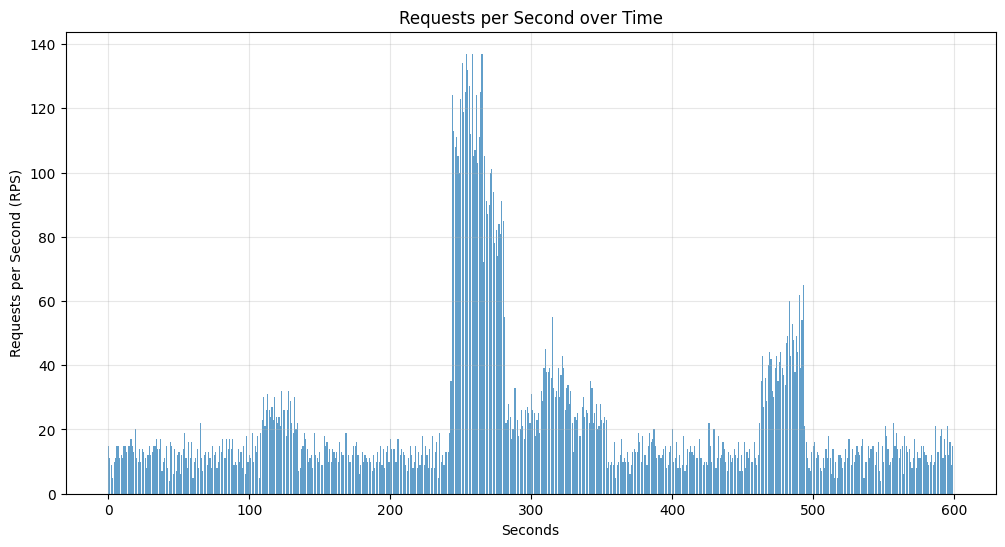

In [58]:
cumulative_times = np.cumsum(intervals)
requests_per_second = [0] * int(TIME)

for time in cumulative_times:
    second = int(time)
    if second < TIME:
        requests_per_second[second] += 1

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(range(len(requests_per_second)), requests_per_second, alpha=0.7)
plt.xlabel('Seconds')
plt.ylabel('Requests per Second (RPS)')
plt.title('Requests per Second over Time')
plt.grid(True, alpha=0.3)
plt.show()


In [59]:
sum(intervals)

600.0000000000092

##### Remember to save your scenario bellow

In [60]:
with open('scenario.delta', 'w') as file:
    for interval in intervals:
        file.write(f"{interval}\n")